In [65]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

#### String of N Nanoparticles @ Pos 1

In [66]:
N_particles             = 5
network_topology        = "cubic"
topology_parameter_1    = {
    "Nx"    : N_particles,
    "Ny"    : 1,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[2,0,0],[4,0,0]]
}
topology_parameter_2    = {
    "Nx"    : N_particles,
    "Ny"    : 1,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[3,0,0],[4,0,0]]
}
np_network_sim_1 = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter_1)
np_network_sim_2 = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter_2)

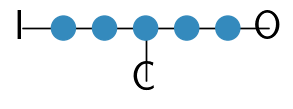

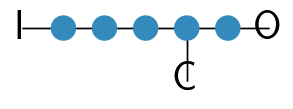

In [67]:
fig, ax = nanonets_utils.display_network(np_network_sim_1, height_scale=0.4, provide_electrode_labels=['I','C','O'],
                                         font_size=30, save_to_path='plots/network_1.pdf', margins=[0,0.2])
fig, ax = nanonets_utils.display_network(np_network_sim_2, height_scale=0.4, provide_electrode_labels=['I','C','O'],
                                         font_size=30, save_to_path='plots/network_2.pdf', margins=[0,0.2])

In [126]:
results_1   = pd.read_csv("data/Nx=5_Ny=1_Nz=1_Ne=3_0.csv")
results_1.loc[(results_1['Error'] == 0) & (results_1['E0'].abs() >= 0.1),'Current'] = np.nan

results_2   = pd.read_csv("data/Nx=5_Ny=1_Nz=1_Ne=3_1.csv")
results_2.loc[results_2['Error'] == 0 & (results_2['E0'].abs() >= 0.1),'Current'] = np.nan

#### Display

In [127]:
data1 = {}
data2 = {}

for V in [-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06]:

    data1[V] = results_1[results_1['E1']==V].sort_values(by='E0').reset_index(drop=True)
    data2[V] = results_2[results_2['E1']==V].sort_values(by='E0').reset_index(drop=True)

In [135]:
e0  = results_1[results_1['E1']==0].sort_values(by='E0')['E0']
df1 = pd.DataFrame()
df2 = pd.DataFrame()

for i, key in enumerate(data1.keys()):

    df1[i] = data1[key]['Current']
    df2[i] = data2[key]['Current']

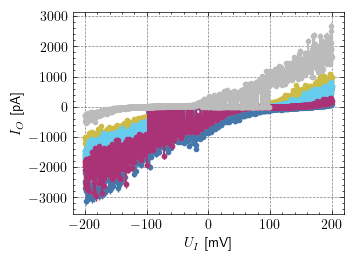

In [111]:
df1 = results_1[results_1['E1']==-0.04].sort_values(by='E0').reset_index(drop=True)
df2 = results_1[results_1['E1']==-0.03].sort_values(by='E0').reset_index(drop=True)
df3 = results_1[results_1['E1']==-0.01].sort_values(by='E0').reset_index(drop=True)
df4 = results_1[results_1['E1']==0.0].sort_values(by='E0').reset_index(drop=True)
df5 = results_1[results_1['E1']==-0.01].sort_values(by='E0').reset_index(drop=True)
df6 = results_1[results_1['E1']==-0.03].sort_values(by='E0').reset_index(drop=True)
df7 = results_1[results_1['E1']==0.04].sort_values(by='E0').reset_index(drop=True)

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.errorbar(df1['E0']*1000, df1['Current'], df1['Error'], marker='.', ls='-', label=f"$U_C = {-0.04*1000}$ mV")
    ax.errorbar(df2['E0']*1000, df2['Current'], df2['Error'], marker='.', ls='-', label=f"$U_C = {-0.03*1000}$ mV")
    ax.errorbar(df3['E0']*1000, df3['Current'], df3['Error'], marker='.', ls='-', label=f"$U_C = {-0.01*1000}$ mV")
    ax.errorbar(df4['E0']*1000, df4['Current'], df4['Error'], marker='.', ls='-', label=f"$U_C = {0.0*1000}$ mV")
    ax.errorbar(df5['E0']*1000, df5['Current'], df5['Error'], marker='.', ls='-', label=f"$U_C = {0.01*1000}$ mV")
    ax.errorbar(df6['E0']*1000, df6['Current'], df6['Error'], marker='.', ls='-', label=f"$U_C = {0.03*1000}$ mV")
    ax.errorbar(df7['E0']*1000, df7['Current'], df7['Error'], marker='.', ls='-', label=f"$U_C = {0.04*1000}$ mV")
    # ax.legend()
    ax.set_xlabel("$U_I$ [mV]")
    ax.set_ylabel("$I_O$ [pA]")
    # fig.savefig("plots/iv_curves_1.pdf", bbox_inches='tight', transparent=True)

In [112]:
df      = pd.DataFrame()
df[0]   = df1['Current']
df[1]   = df2['Current']
df[2]   = df3['Current']
df[3]   = df4['Current']
df[4]   = df5['Current']
df[5]   = df6['Current']
df[6]   = df7['Current']
df

,0,1,2,3,4,5,6
0,-2182.969191,-2096.348847,-1631.467696,-1011.535105,-1631.467696,-2096.348847,-281.070624
1,-2512.245889,-1856.532713,-1564.795392,-1058.729609,-1564.795392,-1856.532713,-464.984992
2,-2457.818300,-1812.774527,-1457.979504,-1794.043512,-1457.979504,-1812.774527,-299.248692
3,-2695.658287,-1975.425074,-1683.885847,-1213.227845,-1683.885847,-1975.425074,-275.033538
4,-2790.116692,-2470.177382,-1500.658902,-1443.255531,-1500.658902,-2470.177382,-234.075679
...,...,...,...,...,...,...,...
1995,111.864304,214.554417,548.285120,858.675210,548.285120,214.554417,2506.068280
1996,109.312732,216.634725,817.106382,962.372477,817.106382,216.634725,2105.133536
1997,80.014997,166.927259,549.959436,725.275229,549.959436,166.927259,2687.689076
1998,94.824257,162.942001,633.749352,856.185925,633.749352,162.942001,1705.981545


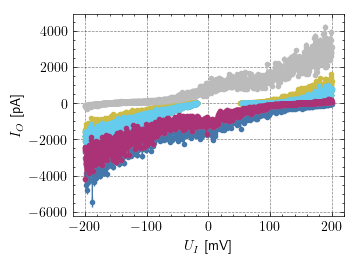

In [113]:
df1 = results_2[results_2['E1']==-0.04].sort_values(by='E0').reset_index(drop=True)
df2 = results_2[results_2['E1']==-0.03].sort_values(by='E0').reset_index(drop=True)
df3 = results_2[results_2['E1']==-0.01].sort_values(by='E0').reset_index(drop=True)
df4 = results_2[results_2['E1']==0.0].sort_values(by='E0').reset_index(drop=True)
df5 = results_2[results_2['E1']==-0.01].sort_values(by='E0').reset_index(drop=True)
df6 = results_2[results_2['E1']==-0.03].sort_values(by='E0').reset_index(drop=True)
df7 = results_2[results_2['E1']==0.04].sort_values(by='E0').reset_index(drop=True)

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.errorbar(df1['E0']*1000, df1['Current'], df1['Error'], marker='.', ls='-', label=f"$U_C = {-0.04*1000}$ mV")
    ax.errorbar(df2['E0']*1000, df2['Current'], df2['Error'], marker='.', ls='-', label=f"$U_C = {-0.03*1000}$ mV")
    ax.errorbar(df3['E0']*1000, df3['Current'], df3['Error'], marker='.', ls='-', label=f"$U_C = {-0.01*1000}$ mV")
    ax.errorbar(df4['E0']*1000, df4['Current'], df4['Error'], marker='.', ls='-', label=f"$U_C = {0.0*1000}$ mV")
    ax.errorbar(df5['E0']*1000, df5['Current'], df5['Error'], marker='.', ls='-', label=f"$U_C = {0.01*1000}$ mV")
    ax.errorbar(df6['E0']*1000, df6['Current'], df6['Error'], marker='.', ls='-', label=f"$U_C = {0.03*1000}$ mV")
    ax.errorbar(df7['E0']*1000, df7['Current'], df7['Error'], marker='.', ls='-', label=f"$U_C = {0.04*1000}$ mV")
    # ax.legend()
    ax.set_xlabel("$U_I$ [mV]")
    ax.set_ylabel("$I_O$ [pA]")
    # fig.savefig("plots/iv_curves_1.pdf", bbox_inches='tight', transparent=True)

In [114]:
df_2      = pd.DataFrame()
df_2[0]   = df1['Current']
df_2[1]   = df2['Current']
df_2[2]   = df3['Current']
df_2[3]   = df4['Current']
df_2[4]   = df5['Current']
df_2[5]   = df6['Current']
df_2[6]   = df7['Current']
df_2

,0,1,2,3,4,5,6
0,-3040.843190,-2452.655618,-1610.420433,-1569.441457,-1610.420433,-2452.655618,-152.729703
1,-2709.512505,-2432.836520,-1810.225859,-1927.187198,-1810.225859,-2432.836520,-147.096590
2,NaN,-2568.983279,-1801.801963,-1466.560427,-1801.801963,-2568.983279,-160.011865
3,NaN,-4201.519674,-2091.912298,-1507.963890,-2091.912298,-4201.519674,-122.458739
4,-4027.543017,NaN,-1578.717858,-1656.572105,-1578.717858,NaN,-249.596636
...,...,...,...,...,...,...,...
1995,-10.295681,161.919817,468.191763,1164.657811,468.191763,161.919817,3181.471480
1996,-15.981882,121.974723,425.250953,1438.384086,425.250953,121.974723,NaN
1997,-12.994280,144.454037,731.663016,1005.736044,731.663016,144.454037,2789.900537
1998,-29.395453,118.823810,697.803902,1033.450765,697.803902,118.823810,2916.434412


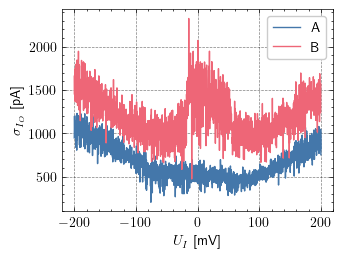

In [143]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.plot(e0*1000, df1.std(axis=1),'-', label='A')
    ax.plot(e0*1000, df2.std(axis=1),'-', label='B')
    # ax.legend()
    ax.set_xlabel("$U_I$ [mV]")
    ax.set_ylabel("$\sigma_{I_O}$ [pA]")
    ax.legend()
    # ax.set_yscale('log')
    fig.savefig("plots/sigma_comp.pdf", bbox_inches='tight', transparent=True)

In [101]:
# results_3   = pd.read_csv("data/c_Nx=5_Ny=1_Nz=1_Ne=3_0.csv")
# results_3   = results_3[results_3['Error'] != 0]

# results_4   = pd.read_csv("data/c_Nx=5_Ny=1_Nz=1_Ne=3_1.csv")
# results_4   = results_4[results_4['Error'] != 0]

In [102]:
# df1 = results_3[results_3['E0']==0.0].sort_values(by='E1')
# df2 = results_3[results_3['E0']==0.01].sort_values(by='E1')
# df3 = results_3[results_3['E0']==0.03].sort_values(by='E1')

# with plt.style.context(["science","bright","grid"]):

#     fig = plt.figure()
#     ax  = fig.add_subplot()
#     ax.errorbar(df1['E1']*1000, df1['Current'], df1['Error'], marker='.', ls='-', label=f"$U_C = {0.0*1000}$ mV")
#     ax.errorbar(df2['E1']*1000, df2['Current'], df2['Error'], marker='.', ls='-', label=f"$U_C = {0.01*1000}$ mV")
#     ax.errorbar(df3['E1']*1000, df3['Current'], df3['Error'], marker='.', ls='-', label=f"$U_C = {0.03*1000}$ mV")
#     ax.legend()
#     ax.set_xlabel("$U_I$ [mV]")
#     ax.set_ylabel("$I_O$ [pA]")
#     fig.savefig("plots/iv_curves_3.pdf", bbox_inches='tight', transparent=True)

In [103]:
# df1 = results_4[results_4['E0']==0.0].sort_values(by='E1')
# df2 = results_4[results_4['E0']==0.01].sort_values(by='E1')
# df3 = results_4[results_4['E0']==0.03].sort_values(by='E1')

# with plt.style.context(["science","bright","grid"]):

#     fig = plt.figure()
#     ax  = fig.add_subplot()
#     ax.errorbar(df1['E1']*1000, df1['Current'], df1['Error'], marker='.', ls='-', label=f"$U_C = {0.0*1000}$ mV")
#     ax.errorbar(df2['E1']*1000, df2['Current'], df2['Error'], marker='.', ls='-', label=f"$U_C = {0.01*1000}$ mV")
#     ax.errorbar(df3['E1']*1000, df3['Current'], df3['Error'], marker='.', ls='-', label=f"$U_C = {0.03*1000}$ mV")
#     ax.legend()
#     ax.set_xlabel("$U_I$ [mV]")
#     ax.set_ylabel("$I_O$ [pA]")
#     fig.savefig("plots/iv_curves_4.pdf", bbox_inches='tight', transparent=True)